<a href="https://colab.research.google.com/github/aqu7he/DS-4002-Group-5/blob/main/Project_1_Master_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import required packages

!pip install vaderSentiment

import vaderSentiment
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import numpy as np
import seaborn as sns
from wordcloud import WordCloud

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.3 MB/s eta 0:00:00


neg: the negative sentiment score (between 0 and 1)

neu: the neutral sentiment score (between 0 and 1)

pos: the positive sentiment score (between 0 and 1)

compound: the overall sentiment score (between -1 and 1)

In [3]:
# let's create our analyzer

analyzer = SentimentIntensityAnalyzer()

# List of example texts to analyze
data = pd.read_csv('chiefs_data.csv')
# data = pd.read_csv('/content/chiefs_data.csv')
# this one only here because Charlie can't figure out how to read in data any other way

text_column= 'title'

def get_sentiment(title):
    analysis = TextBlob(str(title))
    return analysis.sentiment.polarity

# Apply the function to the text column and create a new column for sentiment scores
data['sentiment_score'] = data[text_column].apply(get_sentiment)

# Display the DataFrame with sentiment scores
print(data[['title', 'sentiment_score']])


                                                 title  sentiment_score
0    when youre a two time super bowl champion sb m...         0.566667
1                             his ass was not kidding          0.000000
2    tyreek hill boy  and  has to be the greatest d...         0.750000
3    rice with another stellar performance  catches...         0.283333
4    do you know how embarrassing that is when your...        -0.178571
..                                                 ...              ...
995     smdh i cant believe they called this a penalty         0.000000
996  kctv jackson mahomes arrested accused of aggra...         0.500000
997         taylors dad has officially been converted          0.000000
998  rapoport the chiefs are expected to resign rb ...        -0.100000
999           the perfect nfl draft shirt doesnt exist         1.000000

[1000 rows x 2 columns]


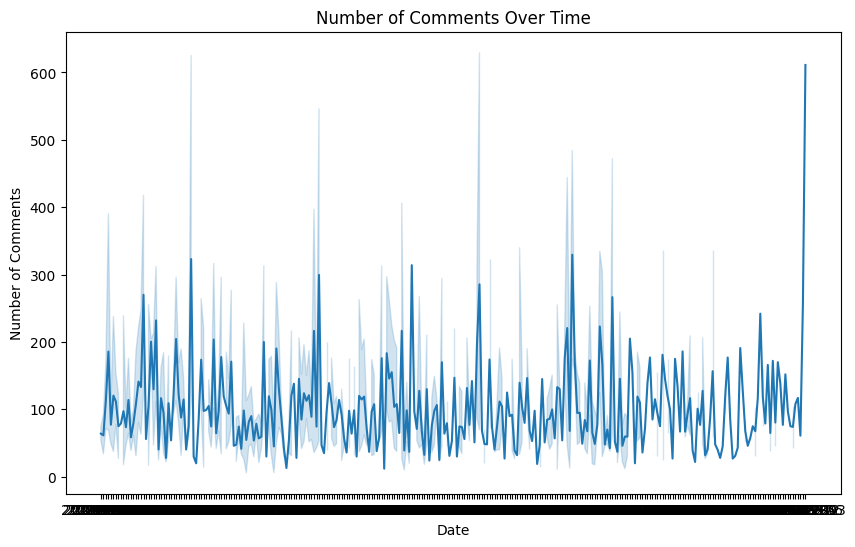

In [4]:
plt.figure(figsize=(10, 6))

filtered_data = data[data['comments'] <= 2000]

sns.lineplot(x='date', y='comments', data=filtered_data)
plt.title("Number of Comments Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Comments")
plt.show()

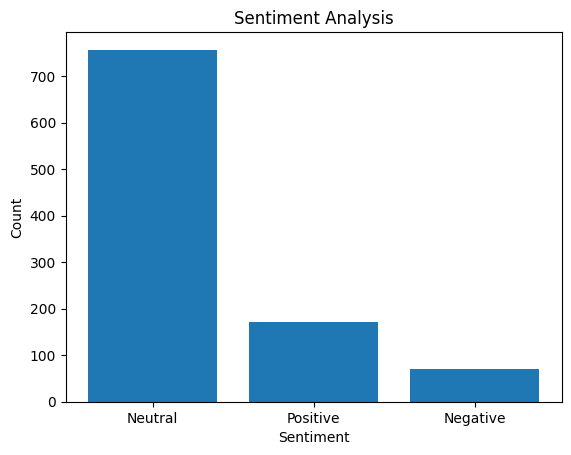

Neutral: 757
Positive: 172
Negative: 71


In [5]:
sentiment_counts = pd.cut(data['sentiment_score'], bins=3, labels=['Negative', 'Neutral', 'Positive']).value_counts()

# Plot the sentiments
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis')
plt.show()

# Print the number of counts for each sentiment
for sentiment, count in sentiment_counts.items():
    print(f"{sentiment}: {count}")

In [6]:
data['date'] = pd.to_datetime(data['date'])

# Specified date
specified_date = pd.to_datetime("2023-09-24")

# Add a new column 'before_after_indicator' based on the comparison with the specified date
data['before_after_indicator'] = np.where(data['date'] < specified_date, 'Before Event', 'After Event')

# Display the updated DataFrame
print(data)

          date   timestamp                                              title  \
0   2023-12-02  1701484827  when youre a two time super bowl champion sb m...   
1   2023-11-05  1699205973                           his ass was not kidding    
2   2023-02-13  1676318314  tyreek hill boy  and  has to be the greatest d...   
3   2023-12-17  1702847139  rice with another stellar performance  catches...   
4   2023-09-25  1695656247  do you know how embarrassing that is when your...   
..         ...         ...                                                ...   
995 2023-12-11  1702308203     smdh i cant believe they called this a penalty   
996 2023-05-03  1683122345  kctv jackson mahomes arrested accused of aggra...   
997 2023-11-12  1699752165         taylors dad has officially been converted    
998 2023-05-01  1682964157  rapoport the chiefs are expected to resign rb ...   
999 2023-04-27  1682626788           the perfect nfl draft shirt doesnt exist   

                           

<ipython-input-7-c1e981dbee69>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='before_after_indicator', data=data, palette=["blue", "orange"])


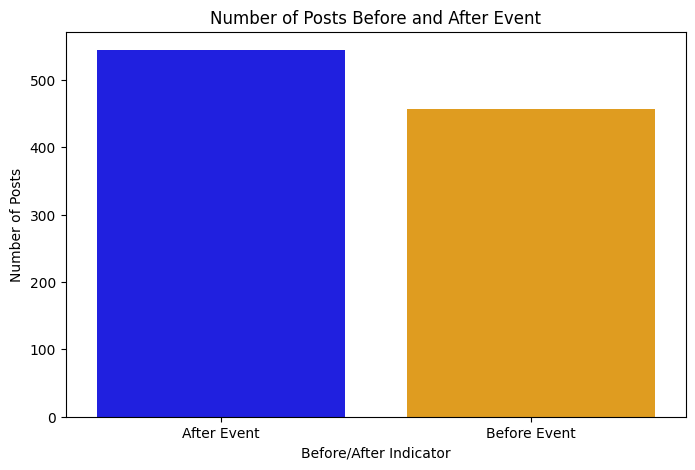

In [7]:
plt.figure(figsize=(8, 5))

sns.countplot(x='before_after_indicator', data=data, palette=["blue", "orange"])
plt.title("Number of Posts Before and After Event")
plt.xlabel("Before/After Indicator")
plt.ylabel("Number of Posts")
plt.show()

<ipython-input-8-5925e7ade192>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='before_after_indicator', y='sentiment_score', data=data, palette=["blue", "orange"])


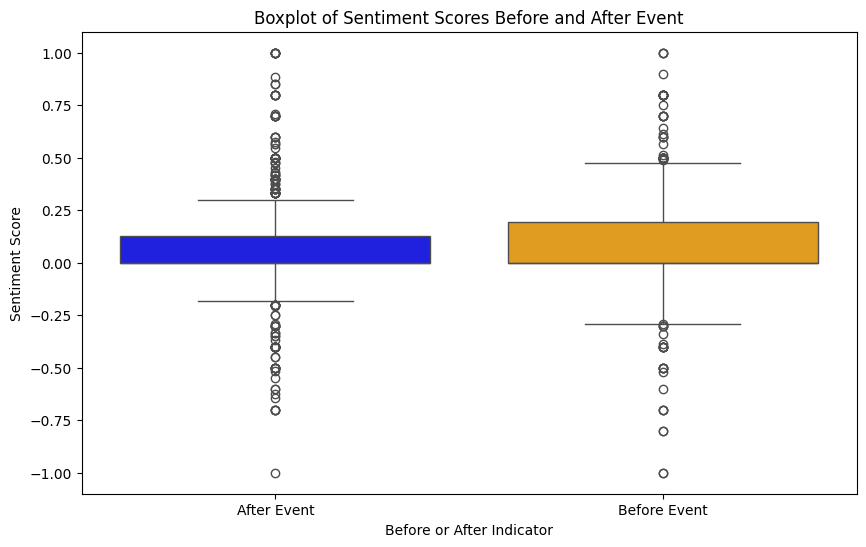

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='before_after_indicator', y='sentiment_score', data=data, palette=["blue", "orange"])
plt.title("Boxplot of Sentiment Scores Before and After Event")
plt.xlabel("Before or After Indicator")
plt.ylabel("Sentiment Score")
plt.show()

<ipython-input-9-e8fd0e6fc924>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='before_after_indicator', y='sentiment_score', data=avg_sentiment, palette=["blue", "orange"])


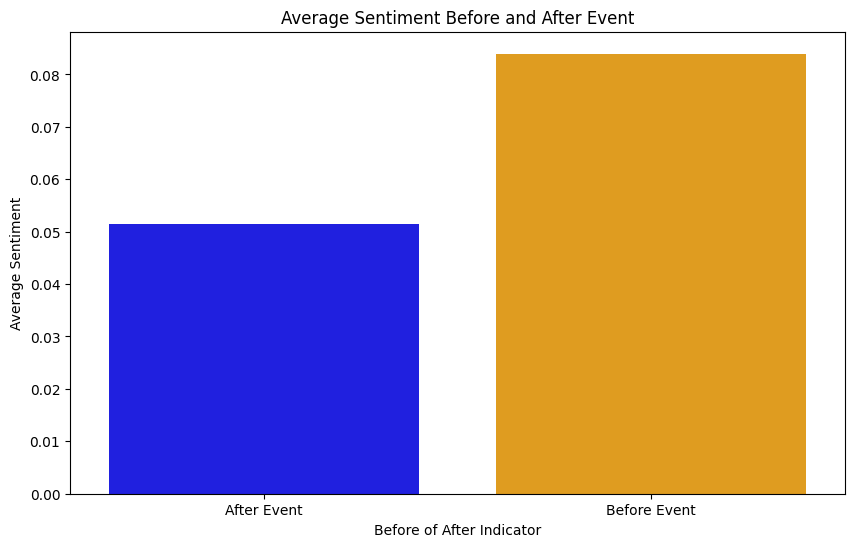

In [9]:
avg_sentiment = data.groupby('before_after_indicator')['sentiment_score'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='before_after_indicator', y='sentiment_score', data=avg_sentiment, palette=["blue", "orange"])
plt.title("Average Sentiment Before and After Event")
plt.xlabel("Before of After Indicator")
plt.ylabel("Average Sentiment")
plt.show()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


(-0.5, 799.5, 399.5, -0.5)

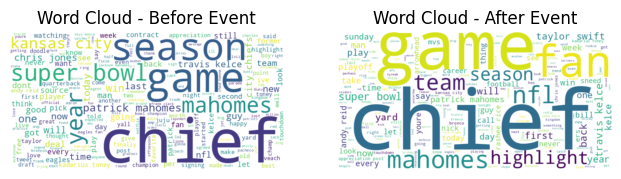

In [10]:
# install nltk to create compound sentiment scores

!pip install nltk seaborn
import nltk
nltk.download('vader_lexicon')

# function for determining compound sentiment scores
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# separate: create word clouds for visualizations
plt.figure(figsize=(12, 8))

plt.subplot(3, 3, 8)
before_event_words = ' '.join(data[data['before_after_indicator'] == 'Before Event']['title'].astype(str))
wordcloud_before_event = WordCloud(min_word_length=3, width=800, height=400, background_color="white").generate(before_event_words)
plt.imshow(wordcloud_before_event, interpolation='bilinear')
plt.title("Word Cloud - Before Event")
plt.axis('off')

# 9. Word Cloud - After Event
plt.subplot(3, 3, 9)
after_event_words = ' '.join(data[data['before_after_indicator'] == 'After Event']['title'].astype(str))
wordcloud_after_event = WordCloud(min_word_length=3, width=800, height=400, background_color="white").generate(after_event_words)
plt.imshow(wordcloud_after_event, interpolation='bilinear')
plt.title("Word Cloud - After Event")
plt.axis('off')


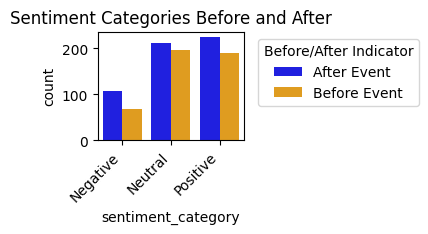

In [11]:
data['title'] = data['title'].astype(str)

# Apply sentiment analysis and calculate compound score
data['compound_score'] = data['title'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Specify a threshold for categorizing as positive or negative
threshold = 0.05

# Categorize sentiment as positive, negative, or neutral based on the compound score
data['sentiment_category'] = pd.cut(data['compound_score'], bins=[float('-inf'), -threshold, threshold, float('inf')],
                                    labels=['Negative', 'Neutral', 'Positive'], include_lowest=True)

# Plotting the count of sentiment categories
plt.subplot(3, 3, 6)
ax = sns.countplot(x='sentiment_category', hue='before_after_indicator', data=data, palette=["blue", "orange"])
plt.title("Sentiment Categories Before and After")

# Rotate x-axis labels
plt.xticks(rotation=45, ha="right")  # Adjust the rotation angle as needed

# Adjust the legend position
plt.legend(title='Before/After Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [12]:
from google.colab import drive

clean_chiefs_data = data.dropna(subset=['text'], how='any')
print(clean_chiefs_data)

# chose not to run this part - Charlie
drive.mount('/content/drive')
clean_chiefs_data.to_csv('/content/drive/My Drive/clean_chiefs_data.csv', index=False)


          date   timestamp                                              title  \
3   2023-12-17  1702847139  rice with another stellar performance  catches...   
5   2023-03-15  1678885214                          from the dark days to now   
20  2023-12-26  1703559505  the chiefs now have the worst turnover differe...   
24  2023-07-22  1690059620               cmon veach please get this deal done   
27  2023-07-04  1688484817  didnt think this would be a conversation wed b...   
..         ...         ...                                                ...   
981 2024-01-22  1705938051  how about mvs making a couple big catches last...   
986 2024-01-30  1706653721  patrick mahomes theres only been like three oc...   
992 2024-01-11  1704992598  my son shoveled snow for two days to buy a pla...   
996 2023-05-03  1683122345  kctv jackson mahomes arrested accused of aggra...   
997 2023-11-12  1699752165         taylors dad has officially been converted    

                           

MessageError: Error: credential propagation was unsuccessful

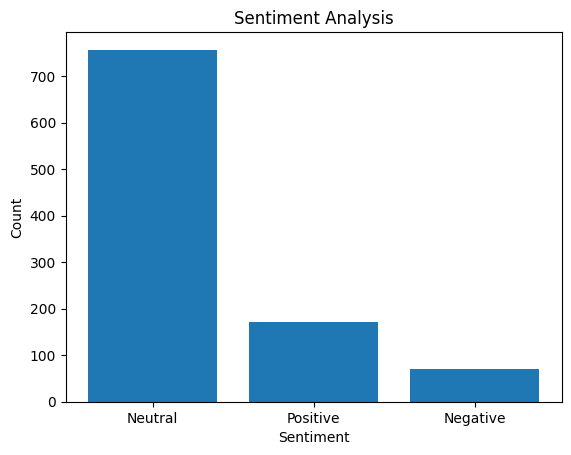

Neutral: 757
Positive: 172
Negative: 71


In [13]:
sentiment_counts = pd.cut(data['sentiment_score'], bins=3, labels=['Negative', 'Neutral', 'Positive']).value_counts()

# Plot the sentiments
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis')
plt.show()

# Print the number of counts for each sentiment
for sentiment, count in sentiment_counts.items():
    print(f"{sentiment}: {count}")

In [14]:
# remaining code for analysis of what we have

# separate data into before 9/24 and after 9/24 based on categorical indicator
chiefs_before = clean_chiefs_data[(clean_chiefs_data['before_after_indicator'] == 'Before Event')]
print(chiefs_before)
chiefs_after = clean_chiefs_data[(clean_chiefs_data['before_after_indicator'] == 'After Event')]
print(chiefs_after)

          date   timestamp                                              title  \
5   2023-03-15  1678885214                          from the dark days to now   
24  2023-07-22  1690059620               cmon veach please get this deal done   
27  2023-07-04  1688484817  didnt think this would be a conversation wed b...   
34  2023-07-14  1689356971                      patrick mahomes fascinates me   
38  2023-02-12  1676211676  before the game and whatever happens after win...   
..         ...         ...                                                ...   
895 2023-06-16  1686894479  kansas city chiefs the moment weve all been wa...   
898 2023-02-14  1676387559  this was the greatest chiefs season of alltime...   
954 2023-04-27  1682597872                                    years ago today   
968 2023-02-12  1676199145  wake the god damn fuck up its the motherfuckin...   
996 2023-05-03  1683122345  kctv jackson mahomes arrested accused of aggra...   

                           

In [15]:
# set up information for conducting t-test
# import required package
import scipy.stats as stats

# extract compound scores only from chiefs_before and chiefs_after
before_scores = chiefs_before['compound_score']
after_scores = chiefs_after['compound_score']

# determine mean compound scores
print('Mean Sentiments Before Taylor: ' + str(before_scores.mean()))
print('Mean Sentiments After Taylor: ' + str(after_scores.mean()))

Mean Sentiments Before Taylor: 0.1010344262295082
Mean Sentiments After Taylor: 0.07020434782608696


In [16]:
# pretty evident that we will fail to reject null, but gonna run the t-test anyways
# using the two tailed scipy test, will divide pval by 2
stats.ttest_ind(after_scores, before_scores)

TtestResult(statistic=-0.5567575722172928, pvalue=0.5783250097260251, df=197.0)

In [17]:
# no need to divide by 2. T-statistic is negative, so sample mean less than H0
# Results not statistically significant, so we fail to reject the null.
# Given small size of our dataset, unlikely that narrower time frame will be good
# but will attempt

# further constrain dataset, using timestamp b/c it's an integer
chiefs_before['date'] = pd.to_datetime(chiefs_before['date'])

# Specified date
specified_date = pd.to_datetime("2023-09-17")

# use greater than or equal to to filter
chiefs_before_narrow = chiefs_before[chiefs_before['date'] >= specified_date]
print(chiefs_before_narrow)

          date   timestamp                                  title  \
79  2023-09-17  1694994662  broncos chargers and raiders all lose   
177 2023-09-17  1694987735                      the good old days   
398 2023-09-21  1695301319                happy retirement dr ldt   

                                                  text         subreddit  \
79   Chargers and broncos both in devastating fashi...  KansasCityChiefs   
177  I hope Taylor turns it around, but it makes me...  KansasCityChiefs   
398  I still wish they let him add M.D. on his jersey.  KansasCityChiefs   

     comments                                                url  \
79         86  https://www.reddit.com/r/KansasCityChiefs/comm...   
177        16  https://www.reddit.com/r/KansasCityChiefs/comm...   
398        34  https://www.reddit.com/r/KansasCityChiefs/comm...   

     sentiment_score before_after_indicator  compound_score sentiment_category  
79               0.0           Before Event         -0.4019     

<ipython-input-17-696ccc20db22>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chiefs_before['date'] = pd.to_datetime(chiefs_before['date'])


In [18]:
# now for the opposite

chiefs_after['date'] = pd.to_datetime(chiefs_after['date'])

# Specified date
specified_date = pd.to_datetime("2023-10-01")

# less than or equal to to filter
chiefs_after_narrow = chiefs_after.loc[chiefs_after['date'] <= specified_date]
print(chiefs_after_narrow)

          date   timestamp                                              title  \
179 2023-09-27  1695841670  i wasnt sure id ever say this but this is a ch...   
374 2023-09-27  1695823758  chiefs fans and arrowhead in general are very ...   

                                                  text         subreddit  \
179  Top 5 in the NFL. The defense is stout and loc...  KansasCityChiefs   
374  As the title states, you guys are very welcomi...  KansasCityChiefs   

     comments                                                url  \
179        69  https://www.reddit.com/r/KansasCityChiefs/comm...   
374        55  https://www.reddit.com/r/KansasCityChiefs/comm...   

     sentiment_score before_after_indicator  compound_score sentiment_category  
179             0.50            After Event          0.6926           Positive  
374             0.35            After Event          0.7693           Positive  


<ipython-input-18-4fd9f017f0b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chiefs_after['date'] = pd.to_datetime(chiefs_after['date'])


In [19]:
# only 5 observations
# will run significance test, just for fun

# extract compound sentiment scores
before_scores = chiefs_before_narrow['compound_score']
after_scores = chiefs_after_narrow['compound_score']

In [20]:
# t test
result = stats.ttest_ind(after_scores, before_scores)

print(result)

TtestResult(statistic=1.3358756736084882, pvalue=0.2738892008255432, df=3.0)


The test statistic is positive. However, the p-value is 0.27, above the treshhold for significance of 0.05. This is unsurprising given the small sample size. While we went on to explore some other possibilities, this is the length of the master code we used once we had data in hand.